#### SP Cashflow Modeling Presentation
---
#### Contents
- basic installment collateral cashflow forecast
- pass through
- warehouse structuring, scenario analysis, comprehensive analytics visuals
- securitization financing structuring, scenario analysis, comprehensive analytics visuals


In [1]:
from AssetModeling.Asset import Asset
from AssetModeling.Storage import AssetStore
from StructureModeling.Storage import StructureStore
from DealManager.DealManager import DealManager
from DealManager.DealAnalytics import DealAnalytics
from Utils.SPCFUtils import SPCFUtils
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')
tabulatePrint = lambda x: print(tabulate(x, headers='keys', tablefmt='psql'))

#### Single collateral modeling. show curves, metrics, yield table

In [2]:
singleAssetDeal = DealManager(dealName = "singleAsset",
                          dealDescriptive = {"dealSubsector":"consumer loan",
                                             "dealSector":"Consumer",
                                             "assetOriginator":"Upstart"                                       
                                             },
                          dealMisc = {"upfrontFees": 1e6},
                          assetScenarios = {"base": AssetStore.ASSETSTORE['consumerLoanUpstart2302']}
                          )
analytics = DealAnalytics(singleAssetDeal)
tabulatePrint(analytics.getAssetStaticMetrics(pxList = range(90,101)))

+----+---------------+---------------------+
|    | matrics/px    | base                |
|----+---------------+---------------------|
|  0 | notional      | 1000000000.0        |
|  1 | wal           | 2.2829543837303623  |
|  2 | intRate       | 0.2175              |
|  3 | term          | 56                  |
|  4 | intPmt        | 431514196.9953185   |
|  5 | prinPmt       | 812935240.8000017   |
|  6 | totalPmt      | 1233929487.9289541  |
|  7 | totalDefault  | 203331260.0         |
|  8 | totalLoss     | 187064759.20000002  |
|  9 | cnl           | 0.1870647592        |
| 10 | cgl           | 0.20333126          |
| 11 | lossTiming    | 40/32/19/9/1        |
| 12 | defaultTiming | 40/32/19/9/1        |
| 13 | 90            | 0.16950531719535267 |
| 14 | 91            | 0.16307026922307966 |
| 15 | 92            | 0.15674540690774919 |
| 16 | 93            | 0.15052741524081892 |
| 17 | 94            | 0.14441311820759228 |
| 18 | 95            | 0.13839947141597353 |
| 19 | 96 

#### ramp up portfolio and showing balance sheet build up and analytics

In [3]:
rampPortfolioDeal = DealManager(dealName = "rampCollateral",
                    dealDescriptive = {"dealSubsector":"consumer loan",
                                       "dealSector":"Consumer",
                                       "assetOriginator":"Upstart"
                                       },
                    rampSchedule = {"ramp": "20 for 12", "px":"100 for 6 98"},
                    dealMisc = {"upfrontFees": 1e6},
                    assetScenarios = {"base": AssetStore.ASSETSTORE['consumerLoanUpstart2302']},
                    )

analytics = DealAnalytics(rampPortfolioDeal)

+----+---------------+---------------------+
|    | matrics/px    | base                |
|----+---------------+---------------------|
|  0 | notional      | 1000000000.0        |
|  1 | wal           | 2.2829543837303623  |
|  2 | intRate       | 0.2175              |
|  3 | term          | 56                  |
|  4 | intPmt        | 431514196.9953185   |
|  5 | prinPmt       | 812935240.8000017   |
|  6 | totalPmt      | 1233929487.9289541  |
|  7 | totalDefault  | 203331260.0         |
|  8 | totalLoss     | 187064759.20000002  |
|  9 | cnl           | 0.1870647592        |
| 10 | cgl           | 0.20333126          |
| 11 | lossTiming    | 40/32/19/9/1        |
| 12 | defaultTiming | 40/32/19/9/1        |
| 13 | 90            | 0.16950531719535267 |
| 14 | 95            | 0.13839947141597353 |
| 15 | 100           | 0.1097428165468406  |
+----+---------------+---------------------+
+----+----------------------+--------------+
|    | matrics/px           |         base |
|----+----

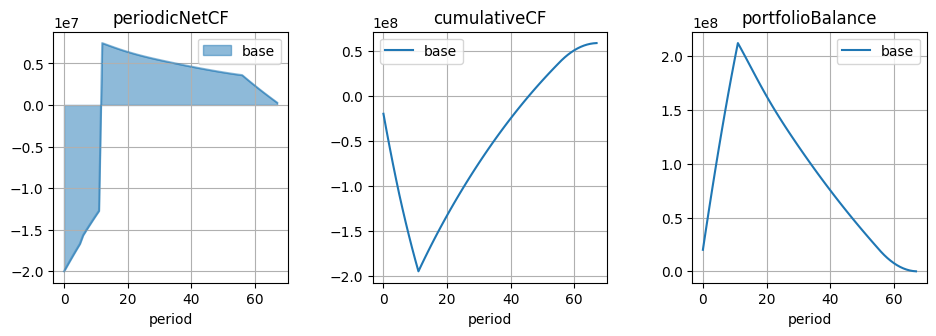

In [6]:
# show single asset economics
tabulatePrint(analytics.getAssetStaticMetrics(ramp=False, pxList = [90,95,100] ))

# show ramped asset economics
tabulatePrint(analytics.getAssetStaticMetrics(ramp=True))

# show ramp curves
analytics.plotRampCurves()


#### Collateral scenarios. Static metrices and curves.



*********************************
******     Capital Stack
*********************************
  class  size  coupon  advRate
0     A   0.0     0.0        0


*************************************************************
******     Asset Economics (single one without ramp)
*************************************************************
                            base          base_1.5x         base_2.0x
matrics/px                                                           
notional            1000000000.0       1000000000.0      1000000000.0
wal                     2.282954           2.149855          1.976973
intRate                   0.2175             0.2175            0.2175
term                          56                 56                56
intPmt          431514196.995318   396896613.271758  362279029.548199
prinPmt         812935240.800002   719402861.200001  625870481.600001
totalPmt       1233929487.928954  1106601530.560575  979273573.192197
totalDefault         203331260.0  

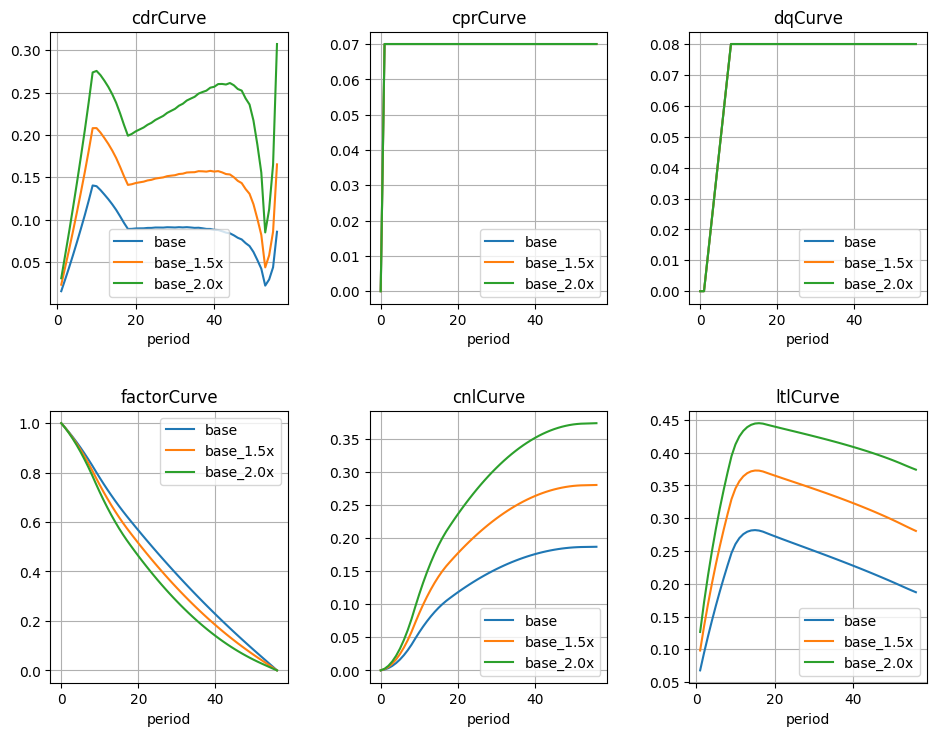

In [7]:
collateralDeal2 = DealManager(dealName = "consumerCollateralDeal",
                    dealDescriptive = {"dealSubsector":"consumer loan",
                                       "dealSector":"Consumer",
                                       "assetOriginator":"Upstart"                                       
                        },
                    dealMisc = {"upfrontFees": 1e6},
                    assetScenarios = {"base": AssetStore.ASSETSTORE['consumerLoanUpstart2302']},
                    )

collateralDeal2.addSeriesDefaultScenario(startingMultiple=1.5, endingMultiple=2.0, step=0.5, baseScenario="base")
analytics = DealAnalytics(collateralDeal2)
analytics.presentDeal()
analytics.plotCollateralCurves()

#### securitization financing structuring, scenario analysis, comprehensive analytics visuals

In [8]:
consumerLoanTermStructureFinanceDeal = DealManager(dealName = "UPST2302",
                    dealDescriptive = {"dealSubsector":"consumer loan",
                                       "dealSector":"Consumer",
                                       "assetOriginator":"Upstart"                                       
                        },
                    rampSchedule = {"ramp": "204", "px":100},
                    dealMisc = {"upfrontFees": 1e6},
                    assetScenarios = {"base": AssetStore.ASSETSTORE['consumerLoanUpstart2302']},
                    financingTerms = StructureStore.STRUCTURESTORE['ConsumerABS']
                    )

consumerLoanTermStructureFinanceDeal.addSeriesDefaultScenario(startingMultiple=1.5, endingMultiple=2.0, step=0.25, baseScenario="base")
analytics = DealAnalytics(consumerLoanTermStructureFinanceDeal)
analytics.presentDeal()





*********************************
******     Capital Stack
*********************************
  class         size  coupon  advRate
0     A  108732000.0  0.0677    53.30
1     B   27438000.0  0.0792    66.75
2     C   37230000.0  0.1187    85.00


*************************************************************
******     Asset Economics (single one without ramp)
*************************************************************
                            base          base_1.5x         base_1.75x  \
matrics/px                                                               
notional            1000000000.0       1000000000.0       1000000000.0   
wal                     2.282954           2.149855           2.069424   
intRate                   0.2175             0.2175             0.2175   
term                          56                 56                 56   
intPmt          431514196.995318   396896613.271758   379587821.409979   
prinPmt         812935240.800002   719402861.200001   67

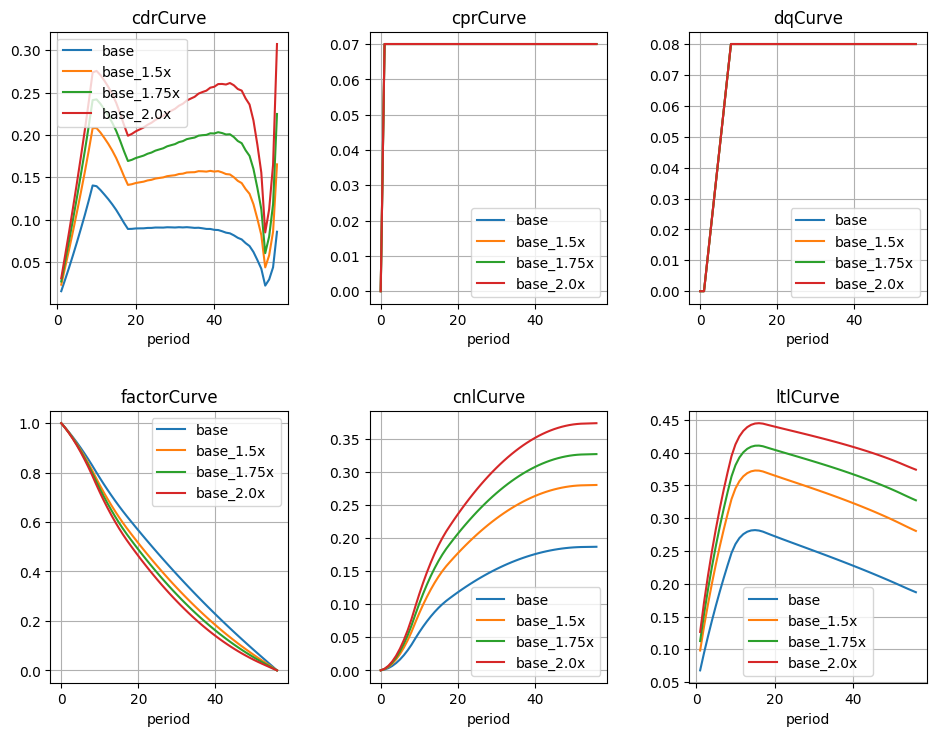

In [9]:

analytics.plotCollateralCurves()

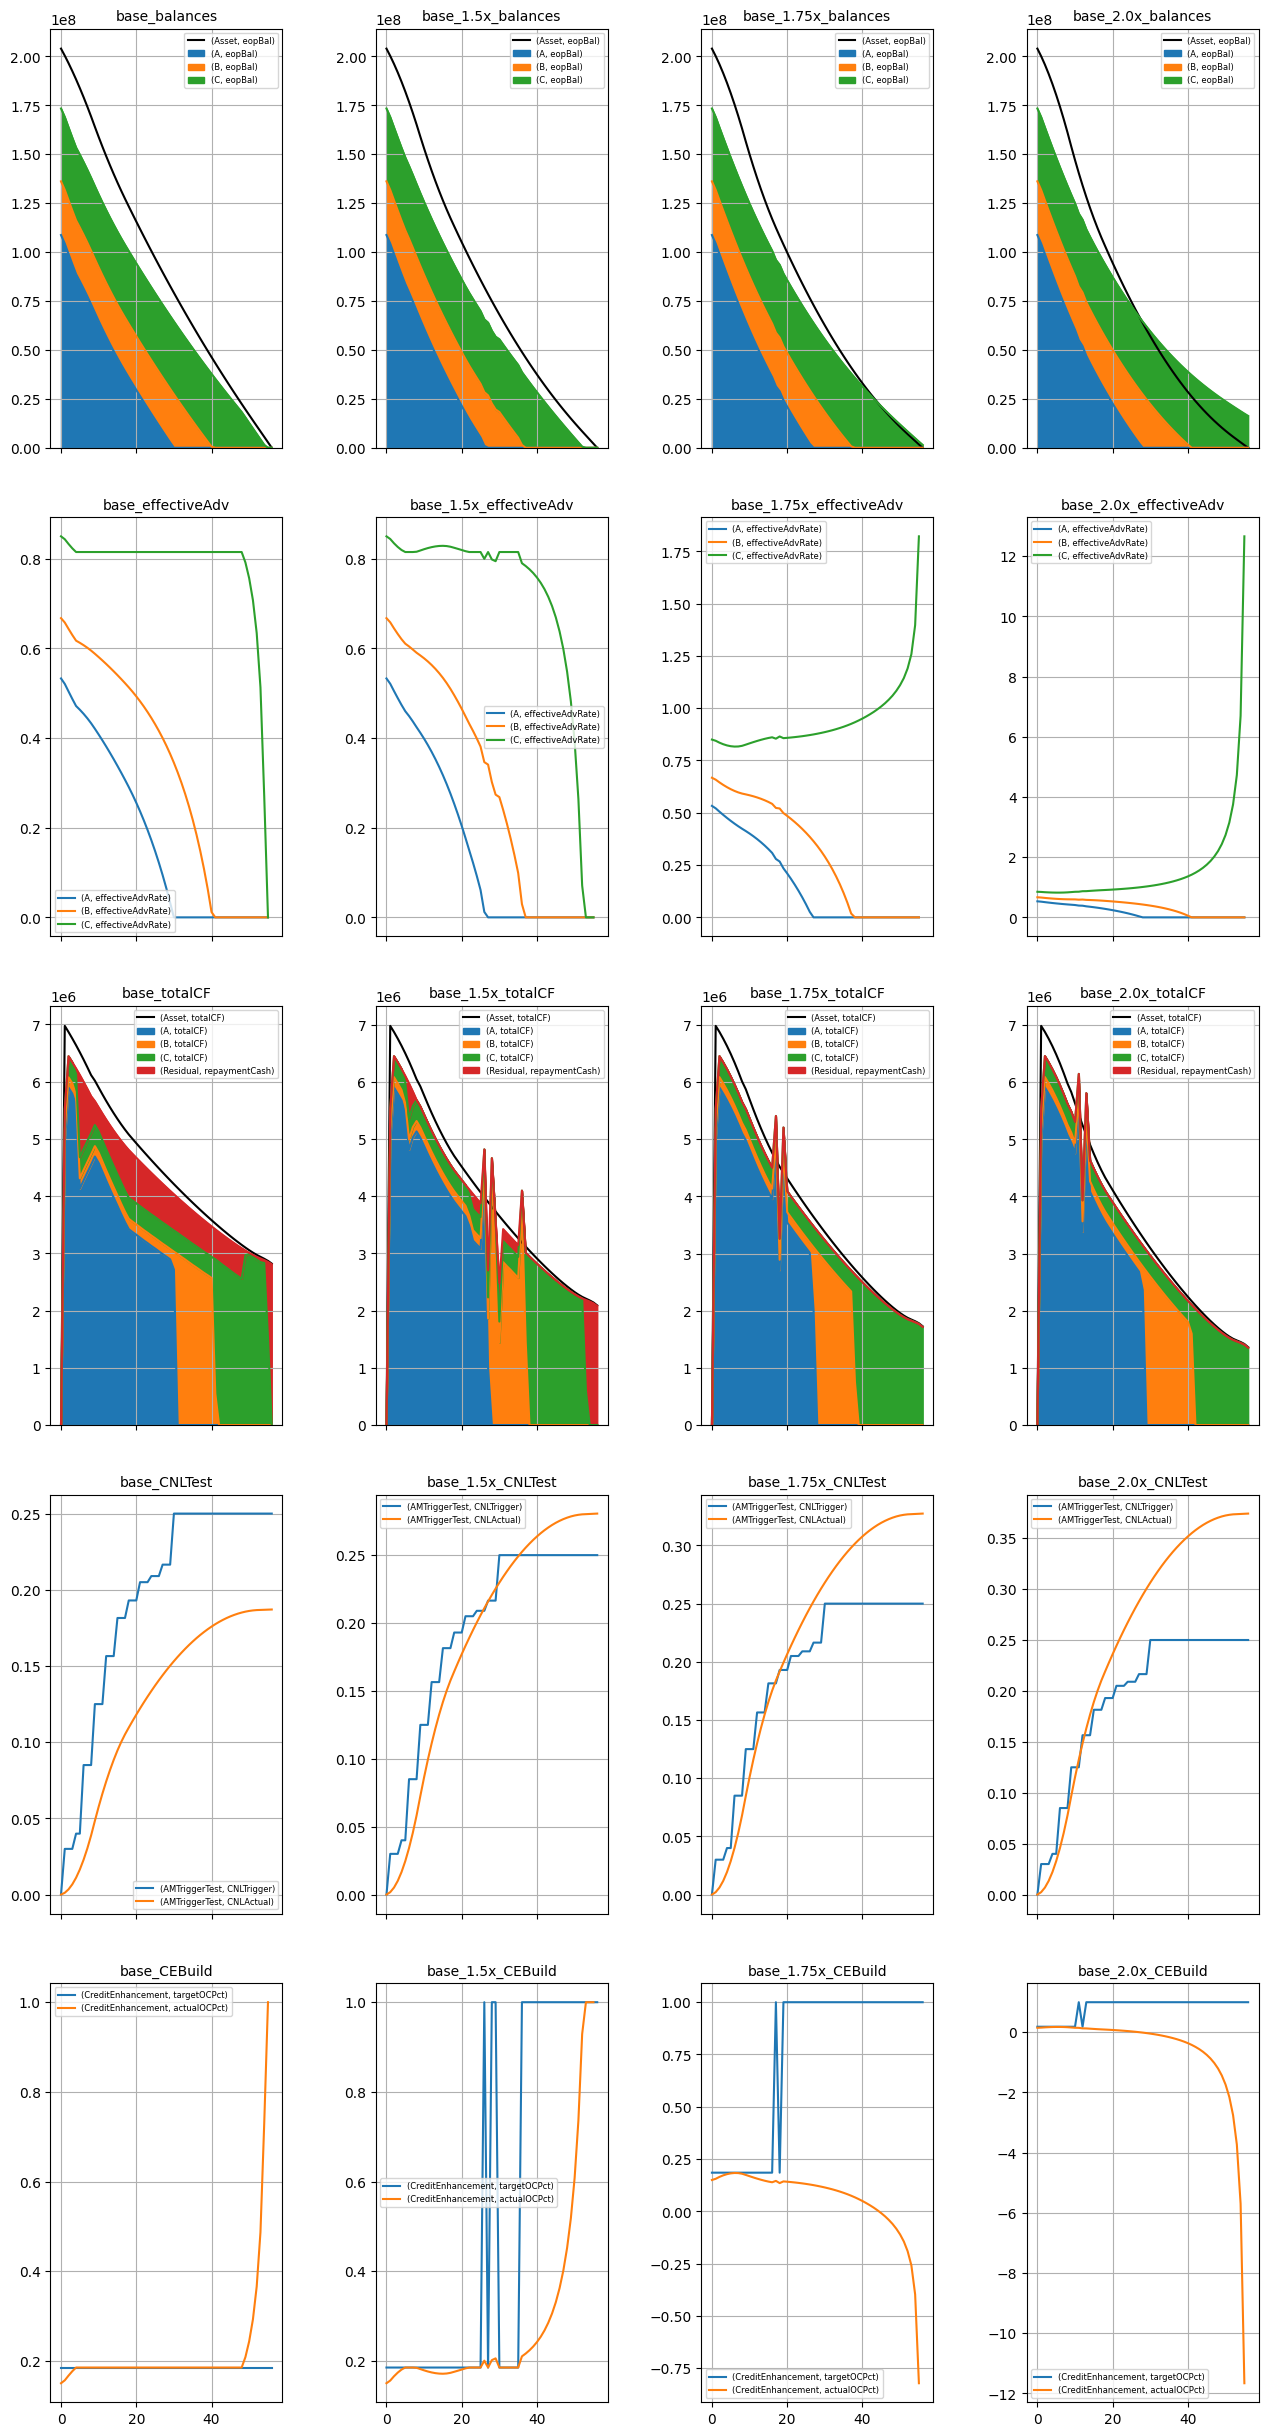

In [10]:
analytics.plotStructureCurves()

#### warehouse structuring, scenario analysis, comprehensive analytics visuals

In [18]:

consumerLoanWHFinanceDeal = DealManager(dealName = "UPST2302",
                                 dealDescriptive = {"dealSubsector":"consumer loan",

                                       "dealSector":"Consumer",
                                       "assetOriginator":"Upstart"                                       
                        },
                    rampSchedule = {"ramp": "100 100", "px":"100 100"},
                    dealMisc = {"upfrontFees": 1e6},
                    assetScenarios = {"base": AssetStore.ASSETSTORE['consumerLoanUpstart2302']},
                    financingTerms = StructureStore.STRUCTURESTORE['WH']
                    )
consumerLoanWHFinanceDeal.addSeriesDefaultScenario(startingMultiple=1.5, endingMultiple=2.0, step=0.5, baseScenario="base")
analytics = DealAnalytics(consumerLoanWHFinanceDeal)
analytics.presentDeal()




*********************************
******     Capital Stack
*********************************
  class  commitPeriod  facilitySize  coupon  undrawnFee paywindow  advRate  \
0   Snr             6   100000000.0    0.07       0.001    7 - 29       70   
1  Mezz             6    30000000.0    0.13       0.002    2 - 35       85   

   effectiveAdvRate  
0          0.326598  
1          0.485059  


*************************************************************
******     Asset Economics (single one without ramp)
*************************************************************
                            base          base_1.5x         base_2.0x
matrics/px                                                           
notional            1000000000.0       1000000000.0      1000000000.0
wal                     2.282954           2.149855          1.976973
intRate                   0.2175             0.2175            0.2175
term                          56                 56                56
intPm

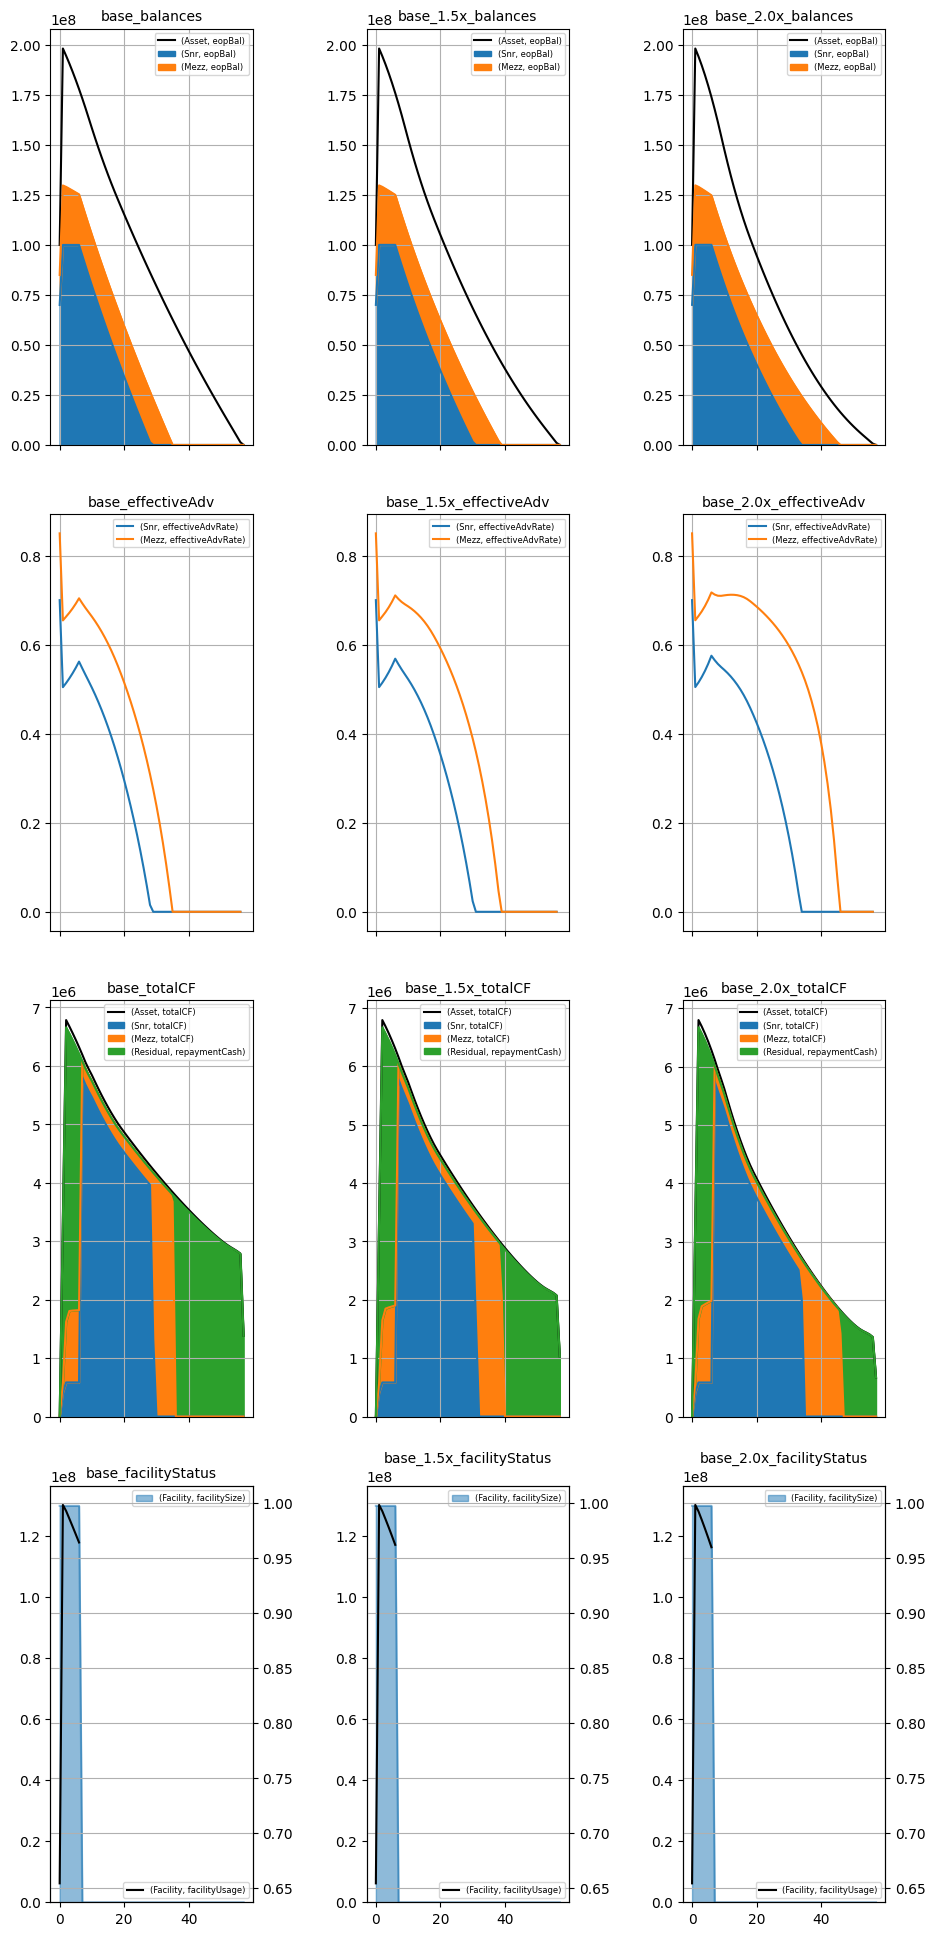

In [19]:
analytics.plotStructureCurves()

#### Deal Representation

In [15]:
print(consumerLoanTermStructureFinanceDeal.getDealIdentity())
print("*" * 200)
print(consumerLoanTermStructureFinanceDeal)

{'dealName': 'UPST2302', 'dealDescriptive': {'dealSubsector': 'consumer loan', 'dealSector': 'Consumer', 'assetOriginator': 'Upstart'}, 'dealMisc': {'upfrontFees': 1000000.0}, 'rampSchedule': {'ramp': '204', 'px': 100}, 'assetScenarios': {'base': {'assetType': 'Amortization', 'notional': 1000000000.0, 'term': 56, 'intRate': 0.2175, 'totalDefault': 0.2038, 'defaultTimingCurve': [0.0064, 0.012, 0.0175, 0.0231, 0.0287, 0.034300000000000004, 0.0398, 0.0454, 0.051, 0.049100000000000005, 0.045899999999999996, 0.0426, 0.0394, 0.0362, 0.033, 0.0297, 0.0265, 0.023700000000000002, 0.023, 0.022400000000000003, 0.0217, 0.021, 0.0204, 0.0197, 0.0191, 0.0184, 0.0177, 0.0171, 0.016399999999999998, 0.015700000000000002, 0.0151, 0.0144, 0.0138, 0.0131, 0.0124, 0.0118, 0.0111, 0.0104, 0.0098, 0.0091, 0.0085, 0.0078000000000000005, 0.0070999999999999995, 0.006500000000000001, 0.0058, 0.0051, 0.0045000000000000005, 0.0038, 0.0032, 0.0025, 0.0018, 0.0012, 0.0005, 0.0005, 0.0005, 0.0005], 'cprVector': [0.07